In [1]:
from kriging_3D import *
from kriging_3D import Calib3D

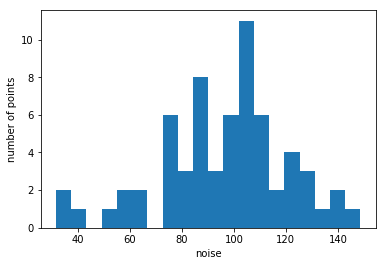

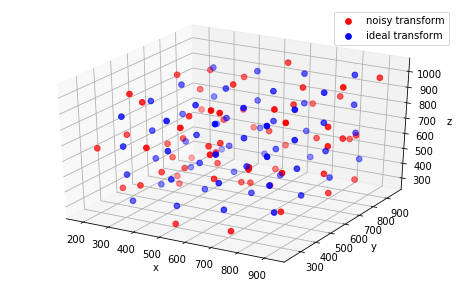

corners_idx: [ 0  3 12 15 48 51 60 63]
skip fine scanning
theta: [7.76922274e-02 1.00000000e-05 1.98069609e-04]
pl: [2. 2. 2.]
theta: [2.18862640e-03 1.02123008e-01 1.00000000e-05]
pl: [2. 2. 2.]
theta: [0.00511698 0.0018921  0.06349714]
pl: [2. 2. 2.]


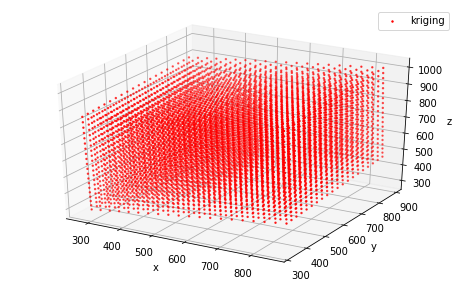


done


In [2]:
# manually find z-levels (roughly) of 8 corners, 
# make sure the beams are within camera space
init_z= [ 300,  800,  400 , 900,  350,900 , 450 ,1000]
calib1=Calib3D(init_z,'simulation')
points1=mesh_3D(4, calib1.img_size1)
fine_scan = calib1.scan_points(points1)
# distance_error_kde(calib1.camera_64_ideal,fine_scan,show=True)
pt1_20=mesh_3D(20, calib1.img_size1)
pt2_20_1=calib1.kriging_3D_predict(points1,fine_scan,pt1_20,show=2)
# distance_error_kde(,show=True)
print('\ndone')

In [9]:
pt2_20_1=calib1.kriging_3D_predict(points1,fine_scan,pt1_20,show=2)
pt1_20_2=calib1.kriging_3D_predict(pt2_20_1,points1,pt2_20_1,show=2)
pt2_20_3=calib1.kriging_3D_predict(points1,pt2_20_1,pt1_20_2,show=2)
pt1_20_4=calib1.kriging_3D_predict(pt2_20_1,points1,pt2_20_3,show=2)
pt2_20_5=calib1.kriging_3D_predict(points1,pt2_20_1,pt1_20_4,show=2)
pt1_20_6=calib1.kriging_3D_predict(pt2_20_1,points1,pt2_20_5,show=2)
pt2_20_7=calib1.kriging_3D_predict(points1,pt2_20_1,pt1_20_6,show=2)

theta: [0.55342374 0.06035785 0.35891865]
pl: [2. 2. 2.]


AttributeError: 'regression_kriging' object has no attribute 'NegLnLike'

In [ ]:
errors=[]
dummy,pt2_20_ideal=calib1.generate_points_3D(pt1_20)

error=distance_error_kde(pt2_20_ideal,pt2_20_1,show=True)
errors.append(error[0][np.argmax(error[1])])
error=distance_error_kde(pt1_20,pt1_20_2,show=True)
errors.append(error[0][np.argmax(error[1])])
error=distance_error_kde(pt2_20_ideal,pt2_20_3,show=True)
errors.append(error[0][np.argmax(error[1])])
error=distance_error_kde(pt1_20,pt1_20_4,show=True)
errors.append(error[0][np.argmax(error[1])])
error=distance_error_kde(pt2_20_ideal,pt2_20_5,show=True)
errors.append(error[0][np.argmax(error[1])])
error=distance_error_kde(pt1_20,pt1_20_6,show=True)
errors.append(error[0][np.argmax(error[1])])
error=distance_error_kde(pt2_20_ideal,pt2_20_7,show=True)


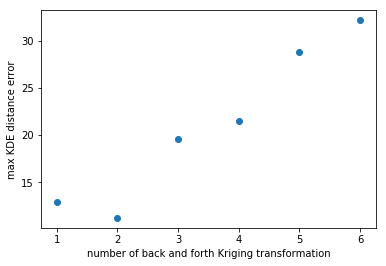

In [5]:
plt.scatter(range(1,7),errors)
plt.xlabel('number of back and forth Kriging transformation')
plt.ylabel('max KDE distance error')
plt.show()